<a href="https://colab.research.google.com/github/Ujjwalgupta28/machine-learning-first-project/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow matplotlib


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.3003 - loss: 1.8818 - val_accuracy: 0.5063 - val_loss: 1.4206
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.4994 - loss: 1.3975 - val_accuracy: 0.6020 - val_loss: 1.1408
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.5612 - loss: 1.2355 - val_accuracy: 0.6408 - val_loss: 1.0464
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.5990 - loss: 1.1361 - val_accuracy: 0.6546 - val_loss: 1.0050
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6233 - loss: 1.0687 - val_accuracy: 0.6704 - val_loss: 0.9497
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.6460 - loss: 1.0126 - val_accuracy: 0.6742 - val_loss: 0.9410
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.6661 - loss: 0.9542 - val_accuracy: 0.6882 - val_loss: 0.8922
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6853 - loss: 0.9041 - 

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7099 - loss: 0.8405
Test Accuracy: 70.87%


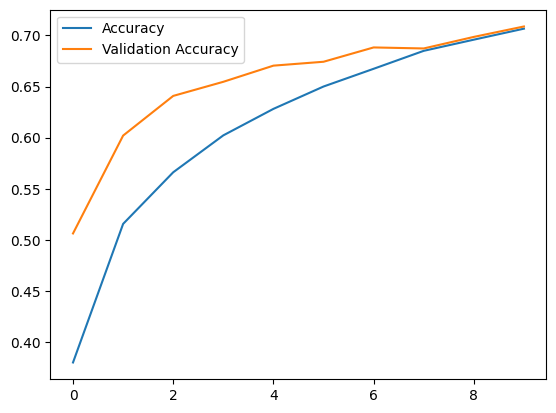

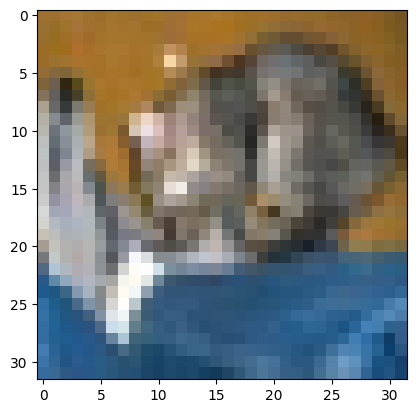

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Class: 3


In [7]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Test with a sample image
import numpy as np
sample_image = x_test[0]
plt.imshow(sample_image)
plt.show()

predicted = np.argmax(model.predict(sample_image.reshape(1, 32, 32, 3)))
print(f"Predicted Class: {predicted}")
